# 듣고싶은 음악, 많이 듣는 음악 찾아보기

1. 데이터
  - [Million Song Dataset](http://millionsongdataset.com): 종류에 따라 매우 다양한 데이터셋을 공개했다
  - [last.fm](http://millionsongdataset.com/lastfm/#getting)
  - 2020 카카오 아레나 대회 - [Melon Playlist Continuation](https://arena.kakao.com/c/7)
  - 데이터를 소개한 논문 [The Million Song Dataset](http://ismir2011.ismir.net/papers/OS6-1.pdf)

* 영상에서 코드와 github에 올려둔 코드와 차이가 있습니다. last.fm 데이터셋 다운로드 받는 부분을 `last.fm section`으로 옮겼습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/data/'

## Load Million Song Dataset
- free available collection of audio features
- metadata, etc
- [datalink_1](https://static.turi.com/datasets/millionsong/10000.txt), [datalink_2](https://static.turi.com/datasets/millionsong/song_data.csv)

In [4]:
import os

In [5]:
if not os.path.exists('song_data.csv'):
  !wget https://static.turi.com/datasets/millionsong/song_data.csv

--2021-01-26 06:59:30--  https://static.turi.com/datasets/millionsong/song_data.csv
Resolving static.turi.com (static.turi.com)... 13.35.109.45, 13.35.109.4, 13.35.109.60, ...
Connecting to static.turi.com (static.turi.com)|13.35.109.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82246673 (78M) [application/octet-stream]
Saving to: ‘song_data.csv’

song_data.csv       100%[===================>]  78.44M  66.2MB/s    in 1.2s    

2021-01-26 06:59:32 (66.2 MB/s) - ‘song_data.csv’ saved [82246673/82246673]



In [6]:
if not os.path.exists('10000.txt'):
  !wget https://static.turi.com/datasets/millionsong/10000.txt

--2021-01-26 06:59:36--  https://static.turi.com/datasets/millionsong/10000.txt
Resolving static.turi.com (static.turi.com)... 13.35.109.4, 13.35.109.45, 13.35.109.60, ...
Connecting to static.turi.com (static.turi.com)|13.35.109.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124114908 (118M) [text/plain]
Saving to: ‘10000.txt’

10000.txt           100%[===================>] 118.36M  87.3MB/s    in 1.4s    

2021-01-26 06:59:38 (87.3 MB/s) - ‘10000.txt’ saved [124114908/124114908]



In [7]:
import pandas as pd
meta_df = pd.read_csv('song_data.csv')

In [8]:
meta_df.shape

(1000000, 5)

In [9]:
meta_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [10]:
count_df = pd.read_csv('10000.txt', header=None, delimiter='\t', verbose=False, names=['user_id', 'song_id', 'song_count'])
count_df.head()

,user_id,song_id,song_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [11]:
count_df.shape

(2000000, 3)

In [12]:
df = pd.merge(count_df, meta_df.drop_duplicates(['song_id']), on='song_id', how='left')
print(df.shape)

(2000000, 7)


In [13]:
df.head()

,user_id,song_id,song_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [14]:
df.to_csv(os.path.join(path, 'million_songs_dataset.csv'), sep='\t')

### Analyze data

- Change `user_id` and `song_id` into integer number

In [15]:
from sklearn.preprocessing import LabelEncoder

song_ids = LabelEncoder()
song_ids.fit(df.song_id)
df.song_id = song_ids.transform(df.song_id)

user_ids = LabelEncoder()
user_ids.fit(df.user_id)
df.user_id = user_ids.transform(df.user_id)

In [16]:
df.head()

,user_id,song_id,song_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [17]:
df.describe()

,user_id,song_id,song_count,year
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.813599e+04,4.978114e+03,3.045485e+00,1.628645e+03
std,2.204443e+04,2.890991e+03,6.579720e+00,7.787283e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.911200e+04,2.430000e+03,1.000000e+00,1.984000e+03
50%,3.794900e+04,5.038000e+03,1.000000e+00,2.002000e+03
75%,5.713500e+04,7.512000e+03,3.000000e+00,2.007000e+03
max,7.635200e+04,9.999000e+03,2.213000e+03,2.010000e+03


In [ ]:
import seaborn as sns
plt = sns.distplot(df.song_count, kde=False)
plt.set_yscale('log')

In [18]:
print(df['user_id'].nunique())
print(df['song_id'].nunique())

76353
10000


In [19]:
stats_df = pd.concat([df.groupby(by='song_id')['song_count'].count(),
                      df.groupby(by='song_id')['song_count'].mean(),
                      df.groupby(by='song_id')['song_count'].std()], axis=1)

In [20]:
stats_df.columns = ['total_song_count', 'avg_song_count', 'std_song_count']
stats_df = stats_df.sort_values(by='total_song_count', ascending=False)
stats_df.head()

,total_song_count,avg_song_count,std_song_count
song_id,,,
2220,8277,3.749668,5.793191
317,7032,7.004124,13.244078
352,6949,3.836955,5.740380
614,6412,8.442920,18.923411
7416,6145,6.740114,16.531309


### Min-Max Scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['song_count'] = scaler.fit_transform(df[['song_count']])
df.head()

,user_id,song_id,song_count,title,release,artist_name,year
0,54961,153,0.000000,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,0.000452,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,0.000000,Stronger,Graduation,Kanye West,2007
3,54961,750,0.000000,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,0.000000,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [28]:
stats_df.head()

,total_song_count,avg_song_count,std_song_count
song_id,,,
2220,8277,3.749668,5.793191
317,7032,7.004124,13.244078
352,6949,3.836955,5.740380
614,6412,8.442920,18.923411
7416,6145,6.740114,16.531309


In [29]:
stats_df.sort_values('avg_song_count', ascending=False)

,total_song_count,avg_song_count,std_song_count
song_id,,,
32,158,18.158228,38.039289
1990,148,16.891892,181.763962
7839,80,16.037500,102.725324
9859,125,15.976000,57.321598
3859,262,15.171756,20.536788
...,...,...,...
8088,74,1.108108,0.424186
7251,68,1.102941,0.306141
3971,65,1.092308,0.422902


## Load Last.fm dataset
  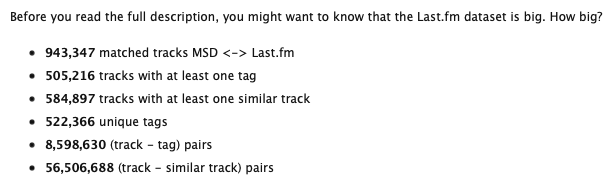

In [30]:
import os, json
from tqdm import tqdm
import pandas as pd

In [31]:
if not os.path.exists(os.path.join(path, 'lastfm_subset')):
  !unzip "/content/drive/MyDrive/data/lastfm_subset.zip" -d "/content/drive/MyDrive/data/"

In [32]:
category_list = [x for x in os.listdir(os.path.join(path, 'lastfm_subset')) if 'DS' not in x]
# [os.listdir(os.path.join(path, 'lastfm_subset/'+x)) for x in category_list]

In [33]:
all_files = []
for root, subdirs, files in tqdm(os.walk((os.path.join(path, 'lastfm_subset')))):
  if len(root.split('/')) == 9:
    for filename in files:
      filepath = os.path.join(root, filename)
      all_files.append(filepath)

print(all_files[:5])

932it [00:45, 20.31it/s]

['/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARRER128F9328521.json', '/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARRMK12903CDF793.json', '/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARROY128F42281F7.json', '/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARRUZ128F9307C57.json', '/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARRYC128F428CCDA.json']


In [34]:
len(all_files)

9330

In [35]:
with open('/content/drive/MyDrive/data/lastfm_subset/A/R/R/TRARRER128F9328521.json', 'r', encoding='utf-8') as f:
  temp = json.load(f)


In [36]:
temp.keys()

dict_keys(['artist', 'timestamp', 'similars', 'tags', 'track_id', 'title'])

In [37]:
# TRARRER128F9328521

In [38]:
temp['tags']

[['chill', '100'], ['Fusion', '100']]

In [39]:
data_list = []
similars_list = []
for filepath in tqdm(all_files[:1000]):
  with open(filepath, 'r', encoding='utf-8') as f:
    data = json.load(f)
    similars_data = {key: data[key] for key in data.keys() & {'similars'}}
    similars_list.append(similars_data)
    data.pop('similars', None)
    data_list.append(data)

100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s]


In [40]:
df = pd.DataFrame(data_list)

In [41]:
df.head()

,artist,timestamp,tags,track_id,title
0,Brand X,2011-08-16 01:14:56.584244,"[[chill, 100], [Fusion, 100]]",TRARRER128F9328521,Liquid Time (composition by John Goodsall)
1,Mistress,2011-08-01 10:03:14.791722,"[[Sludge, 100], [doom metal, 100], [grindcore,...",TRARRMK12903CDF793,Shovel
2,Inoki,2011-08-12 06:16:07.401314,[],TRARROY128F42281F7,Nuovi Re pt. I I (feat. Tek money - Lady Tambler)
3,The Baltimore Consort,2011-08-09 02:26:16.006819,[],TRARRUZ128F9307C57,Howells Delight
4,Amorphis,2011-09-07 18:28:59.990211,[],TRARRYC128F428CCDA,Misery Path (From the Privilege of Evil)


In [42]:
def get_tags(tag_list, threshold=0):
  if len(tag_list) > 0:
    return ' '.join([x[0] if int(x[1]) > threshold else '' for x in tag_list])
  else:
    return ''

In [43]:
df['tags_preprocessed'] = df['tags'].apply(lambda x: get_tags(x))

In [44]:
df.shape

(1000, 6)

In [45]:
df

,artist,timestamp,tags,track_id,title,tags_preprocessed
0,Brand X,2011-08-16 01:14:56.584244,"[[chill, 100], [Fusion, 100]]",TRARRER128F9328521,Liquid Time (composition by John Goodsall),chill Fusion
1,Mistress,2011-08-01 10:03:14.791722,"[[Sludge, 100], [doom metal, 100], [grindcore,...",TRARRMK12903CDF793,Shovel,Sludge doom metal grindcore sludgecore sludge ...
2,Inoki,2011-08-12 06:16:07.401314,[],TRARROY128F42281F7,Nuovi Re pt. I I (feat. Tek money - Lady Tambler),
3,The Baltimore Consort,2011-08-09 02:26:16.006819,[],TRARRUZ128F9307C57,Howells Delight,
4,Amorphis,2011-09-07 18:28:59.990211,[],TRARRYC128F428CCDA,Misery Path (From the Privilege of Evil),
...,...,...,...,...,...,...
995,30 Seconds To Mars,2011-09-08 01:35:25.116942,"[[alternative rock, 100], [rock, 72], [cover, ...",TRANCCN128E0794B18,Hunter,alternative rock rock cover alternative 30 sec...
996,Taking Back Sunday,2011-08-15 23:54:54.028270,"[[emo, 100], [rock, 83], [taking back sunday, ...",TRANDBY128F146E8CC,Spin (Album Version),emo rock taking back sunday alternative rock a...
997,The Clash,2011-08-06 07:42:05.085251,"[[punk, 100], [british, 85], [rock, 57], [the ...",TRANDEK128F4259EBC,Lose This Skin,punk british rock the clash 77davez-all-tracks...
998,Run-D.M.C.,2011-08-05 18:02:20.691972,"[[Hip-Hop, 100], [rap, 83], [old school, 79], ...",TRANDHE128F9305CDA,Run's House,Hip-Hop rap old school old school hip-hop 80s ...


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer()

In [48]:
df['tags_preprocessed'] = df['tags_preprocessed'].fillna('')

In [49]:
tfidf_matrix = tfidf.fit_transform(df['tags_preprocessed'])

In [50]:
tfidf_matrix.shape

(1000, 5135)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [52]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.06790921, 0.01113229,
        0.04261721],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.06790921, 0.        , ..., 1.        , 0.10426123,
        0.01967923],
       [0.        , 0.01113229, 0.        , ..., 0.10426123, 1.        ,
        0.1057081 ],
       [0.        , 0.04261721, 0.        , ..., 0.01967923, 0.1057081 ,
        1.        ]])

In [53]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
pd.DataFrame(indices)

,0
title,
Liquid Time (composition by John Goodsall),0
Shovel,1
Nuovi Re pt. I I (feat. Tek money - Lady Tambler),2
Howells Delight,3
Misery Path (From the Privilege of Evil),4
...,...
Hunter,995
Spin (Album Version),996
Lose This Skin,997


In [54]:
def get_recomendation(title, cossim = cosine_sim ):
    idx = indices[title]
    scores = list(enumerate(cossim[idx])) # 코사인 유사도 점수 리스트

    # 점수를 기준으로 sort 하기
    scores = sorted(scores, key = lambda x:x[1], reverse=True)
    scores = scores[1:11] # Top 10 movies
    scores = [i[0] for i in scores] # get movie index list
     
    return df['title'].iloc[scores]

In [55]:
get_recomendation('Run\'s House')

17                       Spoonie Is Back
949                         Way Way Back
762                             Scenario
40                         Ain't No Game
224                      I Got A Seecret
596               More Than Vocals (MTV)
972                           N.E. Thang
468                               Jane 5
964    The Hood Comes First (LP Version)
929                      All das mag ich
Name: title, dtype: object

In [ ]:
# weighted matrix factorization
# popularity-based recommendation -> ranking (song_count)
# audio features -> deep learning